# Multiple Regression

## Multiple linear regression model

Last week we looked at linear models with 1 predictor (either continuous or categorical with 2 levels). Now we are going to extend this to linear models with more than 1 predictor.

We have already seen the assumptions of multiple linear regression last week. They are essentially the same as for simple linear regression but now we should also check that the predictors are not correlated.

Open RStudio.

Open a new R script in R and **save it as** `wpa_9_LastFirst.R` (where Last and First is your last and first name). 

Careful about: capitalizing, last and first name order, and using `_` instead of `-`.

At the top of your script, write the following (**with appropriate changes**):

In [1]:
# Assignment: WPA 9
# Name: Laura Fontanesi
# Date: 4 May 2021

## 1. Model fitting

Model fit can be achieved as in simple linear regression using `lm()`.

the only thing to take into account is how to change the formula argument:

- `outcome ~ predictor1 + predictor2`: tests main effects only of these two predictors
- `outcome ~ predictor1 * predictor2`: tests all main effects and the interaction effect of these two predictors
- `outcome ~ predictor1 * predictor2 * predictor3`: tests all main effects and all interaction effect of these three predictors
- `outcome ~ predictor1 + predictor2 + predictor3 + predictor1*predictor2`: tests main all three main effects and only the interaction effect of the first and second predictor

In [2]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# only for notebooks
options(repr.plot.width = 5, repr.plot.height = 4)

In [5]:
house_prices = read_csv('https://raw.githubusercontent.com/laurafontanesi/r-seminar/master/data/house_prices.csv')


── Column specification ──────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  Id = col_double(),
  MSSubClass = col_double(),
  LotFrontage = col_double(),
  LotArea = col_double(),
  OverallQual = col_double(),
  OverallCond = col_double(),
  YearBuilt = col_double(),
  YearRemodAdd = col_double(),
  MasVnrArea = col_double(),
  BsmtFinSF1 = col_double(),
  BsmtFinSF2 = col_double(),
  BsmtUnfSF = col_double(),
  TotalBsmtSF = col_double(),
  `1stFlrSF` = col_double(),
  `2ndFlrSF` = col_double(),
  LowQualFinSF = col_double(),
  GrLivArea = col_double(),
  BsmtFullBath = col_double(),
  BsmtHalfBath = col_double(),
  FullBath = col_double()
  # ... with 18 more columns
)
ℹ Use `spec()` for the full column specifications.




In [6]:
glimpse(house_prices)

Rows: 1,460
Columns: 81
$ Id            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ MSSubClass    <dbl> 60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20,…
$ MSZoning      <chr> "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "R…
$ LotFrontage   <dbl> 65, 80, 68, 60, 84, 85, 75, NA, 51, 50, 70, 85, NA, 91, …
$ LotArea       <dbl> 8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 612…
$ Street        <chr> "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", …
$ Alley         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ LotShape      <chr> "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", …
$ LandContour   <chr> "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", …
$ Utilities     <chr> "AllPub", "AllPub", "AllPub", "AllPub", "AllPub", "AllPu…
$ LotConfig     <chr> "Inside", "FR2", "Inside", "Corner", "FR2", "Inside", "I…
$ LandSlope     <chr> "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", …
$ Neighborhood  

GrLivArea: Above grade (ground) living area square feet

LotArea: Lot size in square feet

GarageArea: Size of garage in square feet

In [7]:
# Main effects model:
model_fit = lm(SalePrice ~ LotArea + GarageArea + GrLivArea, 
               data = house_prices)
summary(model_fit)


Call:
lm(formula = SalePrice ~ LotArea + GarageArea + GrLivArea, data = house_prices)

Residuals:
    Min      1Q  Median      3Q     Max 
-500375  -22148    -977   19699  315357 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8031.7724  4154.7983  -1.933 0.053414 .  
LotArea         0.4821     0.1346   3.582 0.000353 ***
GarageArea    137.0127     6.8638  19.962  < 2e-16 ***
GrLivArea      78.5759     2.8472  27.597  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49400 on 1456 degrees of freedom
Multiple R-squared:  0.6142,	Adjusted R-squared:  0.6134 
F-statistic: 772.6 on 3 and 1456 DF,  p-value: < 2.2e-16


In [8]:
# Full model (including also interactions effects):
model_fit = lm(SalePrice ~ LotArea*GarageArea*GrLivArea, 
               data = house_prices)
summary(model_fit)

# Note: Have main effects changed?


Call:
lm(formula = SalePrice ~ LotArea * GarageArea * GrLivArea, data = house_prices)

Residuals:
    Min      1Q  Median      3Q     Max 
-289270  -20605     590   19121  288645 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   8.894e+04  1.229e+04   7.235 7.49e-13 ***
LotArea                      -2.232e+00  1.166e+00  -1.915  0.05574 .  
GarageArea                   -9.108e+01  2.109e+01  -4.319 1.68e-05 ***
GrLivArea                     8.923e+00  7.726e+00   1.155  0.24831    
LotArea:GarageArea            6.629e-03  1.437e-03   4.614 4.30e-06 ***
LotArea:GrLivArea             1.935e-03  5.433e-04   3.562  0.00038 ***
GarageArea:GrLivArea          1.522e-01  1.208e-02  12.599  < 2e-16 ***
LotArea:GarageArea:GrLivArea -4.305e-06  4.774e-07  -9.016  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45950 on 1452 degrees of freedom
Multiple R-squared:  0.667,	Ad

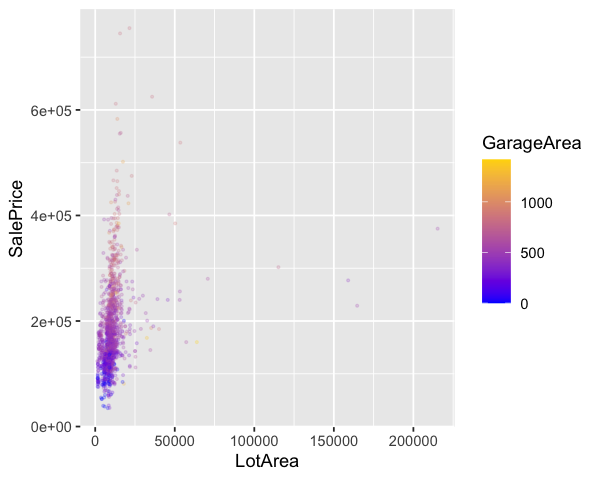

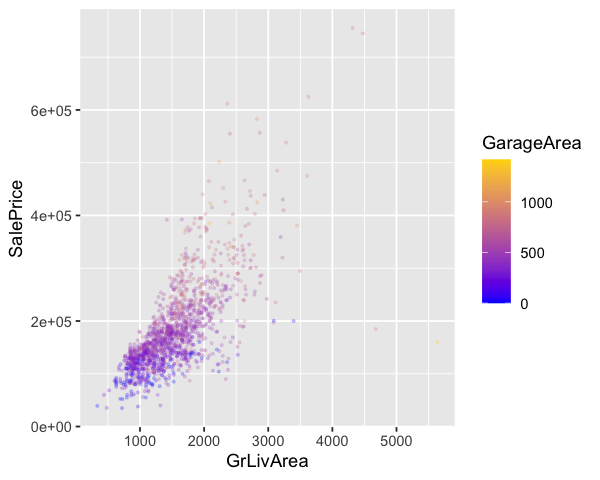

In [9]:
# How to visualize it?

ggplot(data = house_prices, aes(x = LotArea, y = SalePrice, color=GarageArea)) +
  geom_jitter(alpha=.2, size=.5) +
  scale_colour_gradient(low = "blue", high = "gold", limits=range(house_prices[,'GarageArea']))

ggplot(data = house_prices, aes(x = GrLivArea, y = SalePrice, color=GarageArea)) +
  geom_jitter(alpha=.2, size=.5) +
  scale_colour_gradient(low = "blue", high = "gold", limits=range(house_prices[,'GarageArea']))

In [10]:
# It looks like there are some correlations between predictors...
M = cor(select(house_prices, LotArea, GarageArea, GrLivArea))
M

,LotArea,GarageArea,GrLivArea
LotArea,1.0000000,0.1804028,0.2631162
GarageArea,0.1804028,1.0000000,0.4689975
GrLivArea,0.2631162,0.4689975,1.0000000


In [11]:
# To test more formally (bewtween 2 variables):
cor.test(house_prices$GarageArea, house_prices$GrLivArea)

# This means that the assumptions were violated and the coefficients should be interpreted with caution


	Pearson's product-moment correlation

data:  house_prices$GarageArea and house_prices$GrLivArea
t = 20.276, df = 1458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4279930 0.5080752
sample estimates:
      cor 
0.4689975 


In [13]:
install.packages("lsr")


The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpIWQY4P/downloaded_packages


In [14]:
library(lsr)

In [15]:
# Hypothesis tests for all pairwise correlations:

correlate(as.data.frame(select(house_prices, LotArea, GarageArea, GrLivArea)), test=TRUE)

,LotArea,GarageArea,GrLivArea
LotArea,NA,0.1804028,0.2631162
GarageArea,0.1804028,NA,0.4689975
GrLivArea,0.2631162,0.4689975,NA
,LotArea,GarageArea,GrLivArea
LotArea,NA,3.802721e-12,3.040961e-24
GarageArea,3.802721e-12,NA,3.010540e-80
GrLivArea,3.040961e-24,3.010540e-80,NA
,LotArea,GarageArea,GrLivArea
LotArea,1460,1460,1460
GarageArea,1460,1460,1460


In [18]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpIWQY4P/downloaded_packages


In [19]:
library('corrplot')

corrplot 0.84 loaded



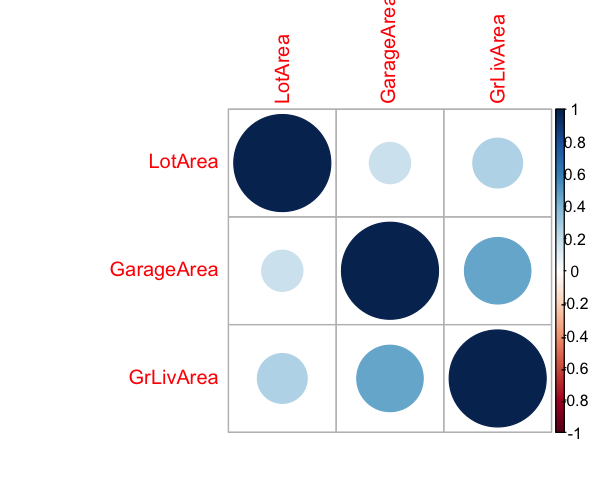

In [20]:
# To better visualize the correlation matrix:

corrplot(M)

## 2. Calculating standardised regression coefficients

One more thing that you might want to do is to calculate “standardised” regression coefficients: your predictors are often on different scales and this makes it very difficult to compare the coefficients of different predictors.

The standardised coefficients are the coefficients that you would have obtained if you’d converted all the variables to z-scores before running the regression.

You can then either standardize them first, or use the `standardCoefs` function in R.

In [21]:
model_fit = lm(SalePrice ~ LotArea+GarageArea+GrLivArea, 
               data = house_prices)
summary(model_fit)
standardCoefs(model_fit)


Call:
lm(formula = SalePrice ~ LotArea + GarageArea + GrLivArea, data = house_prices)

Residuals:
    Min      1Q  Median      3Q     Max 
-500375  -22148    -977   19699  315357 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8031.7724  4154.7983  -1.933 0.053414 .  
LotArea         0.4821     0.1346   3.582 0.000353 ***
GarageArea    137.0127     6.8638  19.962  < 2e-16 ***
GrLivArea      78.5759     2.8472  27.597  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49400 on 1456 degrees of freedom
Multiple R-squared:  0.6142,	Adjusted R-squared:  0.6134 
F-statistic: 772.6 on 3 and 1456 DF,  p-value: < 2.2e-16


,b,beta
LotArea,0.4820601,0.06056669
GarageArea,137.0127177,0.36874445
GrLivArea,78.5759048,0.51974818


In [22]:
house_prices = mutate(house_prices,
                      z_LotArea = scale(LotArea, center = TRUE, scale = TRUE),
                      z_GarageArea = scale(GarageArea, center = TRUE, scale = TRUE),
                      z_GrLivArea = scale(GrLivArea, center = TRUE, scale = TRUE),
                      z_SalePrice = scale(SalePrice, center = TRUE, scale = TRUE))

In [23]:
st_model_fit = lm(z_SalePrice ~ z_LotArea+z_GarageArea+z_GrLivArea, 
               data = house_prices)
summary(st_model_fit)

# Look what happened now to the intercept?


Call:
lm(formula = z_SalePrice ~ z_LotArea + z_GarageArea + z_GrLivArea, 
    data = house_prices)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2986 -0.2788 -0.0123  0.2480  3.9696 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.779e-16  1.627e-02   0.000 1.000000    
z_LotArea    6.057e-02  1.691e-02   3.582 0.000353 ***
z_GarageArea 3.687e-01  1.847e-02  19.962  < 2e-16 ***
z_GrLivArea  5.197e-01  1.883e-02  27.597  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6218 on 1456 degrees of freedom
Multiple R-squared:  0.6142,	Adjusted R-squared:  0.6134 
F-statistic: 772.6 on 3 and 1456 DF,  p-value: < 2.2e-16


# ANOVA

## General linear models

We use linear regression models when we want to predict a continuous variable based on one or more continuous variables, assuming a linear relationship.

But we can also predict a continuous variable based on one or more categorical variables using ANOVA.

Both linear regression and ANOVA, however, are part of the same category of models: [general linear models](https://en.wikipedia.org/wiki/General_linear_model).

The general linear model or **multivariate regression model** is a statistical linear model. It may be written as:

**Y = XB + U**,

where:
- **Y** is a matrix with series of multivariate measurements (each column being a set of measurements on one of the dependent variables), 
- **X** is a matrix of observations on independent variables that might be a design matrix (each column being a set of observations on one of the independent variables), 
- **B** is a matrix containing parameters that are usually to be estimated 
- and **U** is a matrix containing errors (noise). The errors are usually assumed to be uncorrelated across measurements, and follow a multivariate normal distribution.

The general linear model incorporates a number of different statistical models: ANOVA, ANCOVA, MANOVA, MANCOVA, ordinary linear regression, t-test and F-test.

## When to use ANOVA/linear regression?
In practice, we use Analysis of variance (ANOVA) when we have categorical-only predictors. As soon as we have at least one continuous predictor we would switch to linear regression. 

The conversion between ANOVA and regression depends on how we code the categorical predictors (see [here](https://www.theanalysisfactor.com/why-anova-and-linear-regression-are-the-same-analysis/) for a clear example).

## Different types of ANOVAS

- **One-way ANOVA** is used to test for differences among two or more independent groups (means), e.g. different levels of urea application in a crop, or different levels of antibiotic action on several different bacterial species, or different levels of effect of some medicine on groups of patients. 

- However, should these groups not be independent, and there is an order in the groups (such as mild, moderate and severe disease), or in the dose of a drug (such as 5 mg/mL, 10 mg/mL, 20 mg/mL) given to the same group of patients, then a linear trend estimation should be used. Typically, however, the one-way ANOVA is used to test for differences among at least three groups, since the two-group case can be covered by a t-test. **When there are only two means to compare, the t-test and the ANOVA F-test are equivalent**; the relation between ANOVA and t is given by F = t2.

- **Two-way ANOVA** is an extension of the one-way ANOVA that examines the influence of two different categorical independent variables on one continuous dependent variable. The two-way ANOVA not only aims at assessing the main effect of each independent variable but also if there is any interaction between them.

- **Repeated measures ANOVA** is used when the same subjects are used for each treatment (e.g., in a longitudinal study).

- **Multivariate analysis of variance (MANOVA)** is used when there is more than one response variable.

## ANOVA's assumptions

Because ANOVA and linear regression are *essentially* the same (see better explanations above), the model's assumptions are also very similar:

- **Normality**: The residuals are assumed to be normally distributed. As we saw for linear regression, we can assess this by looking at QQ plots or running a Shapiro-Wilk test.
- **Homogeneity of variance (homoscedasticity)**: ANOVA assumes that the population standard deviation is the same for all groups.  We can assess this using the Levene's test (see below) and visually using a violin or similar plots.
- **Independence**: the observations should be independent. In case of repeated measures study, you should then use the repeated measure ANOVA (that we don't cover in this course).

## 3. Model fitting

To fit ANOVAs, we use the `aov()` function.

This function works very similarly to the `lm()` function: you need a `formula` argument and a `data` argument to make it work.

In [24]:
sub_house_prices = filter(house_prices, Foundation == "Slab" | Foundation == "Stone" | Foundation == "Wood")

arrange(summarize(group_by(sub_house_prices, Foundation),
          mean_SalePrice = mean(SalePrice),
          sd_SalePrice = sd(SalePrice)),
        mean_SalePrice)

Foundation,mean_SalePrice,sd_SalePrice
<chr>,<dbl>,<dbl>
Slab,107365.6,34213.98
Stone,165959.2,78557.70
Wood,185666.7,56695.09


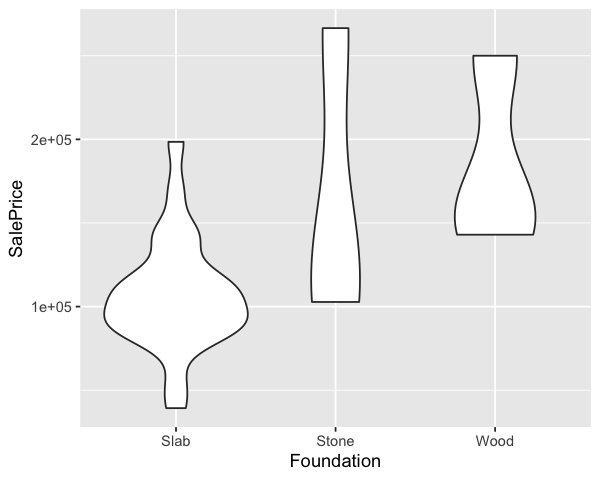

In [25]:
ggplot(data = sub_house_prices, mapping = aes(y = SalePrice, x = Foundation)) +
  geom_violin()

Note that you can also here check whether the normality assumption is violated or not. You can do so by also plotting separate histograms per level of your categorical variable.

More formally:

In [26]:
shapiro.test(filter(sub_house_prices, Foundation == "Slab")$SalePrice)
shapiro.test(filter(sub_house_prices, Foundation == "Stone")$SalePrice)
shapiro.test(filter(sub_house_prices, Foundation == "Wood")$SalePrice)


	Shapiro-Wilk normality test

data:  filter(sub_house_prices, Foundation == "Slab")$SalePrice
W = 0.94837, p-value = 0.2498



	Shapiro-Wilk normality test

data:  filter(sub_house_prices, Foundation == "Stone")$SalePrice
W = 0.74492, p-value = 0.01776



	Shapiro-Wilk normality test

data:  filter(sub_house_prices, Foundation == "Wood")$SalePrice
W = 0.89046, p-value = 0.3558


In [27]:
install.packages("car") # For the test of equal variances, we need a package called car.

also installing the dependencies ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘maptools’, ‘rio’, ‘lme4’





The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpIWQY4P/downloaded_packages


In [28]:
library(car)
# Levene's test of equal variances. 
# Low p-value means the variances are not equal. 
# First argument = continuous dependent variable, second argument = categorical independent variable.
leveneTest(sub_house_prices$SalePrice, sub_house_prices$Foundation) 

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Warning message in leveneTest.default(sub_house_prices$SalePrice, sub_house_prices$Foundation):
“sub_house_prices$Foundation coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.082361,0.1422821
,30,NA,NA


In [29]:
# Finally, the actual ANOVA:
model_fit = aov(SalePrice ~ Foundation, 
                data = sub_house_prices)
summary(model_fit)

            Df    Sum Sq   Mean Sq F value Pr(>F)   
Foundation   2 2.857e+10 1.428e+10   6.674  0.004 **
Residuals   30 6.421e+10 2.140e+09                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
print(model_fit)

Call:
   aov(formula = SalePrice ~ Foundation, data = sub_house_prices)

Terms:
                 Foundation   Residuals
Sum of Squares  28569939851 64208950589
Deg. of Freedom           2          30

Residual standard error: 46263.36
Estimated effects may be unbalanced


## 4. Tukey’s honest significant difference test:

Note that ANOVA tests the null hypothesis that the means in all our groups are equal. A rejection of this null hypothesis means that there is a significant difference in at least one of the possible pairs of means. 

To get an idea of which pair of means contains a significant difference, we can follow up with Tukey’s test that will give us all pairwise comparisons. 

Tukey’s test corrects the p-values upwards — so it is more conservative in deciding something is significant — because the comparisons are post-hoc or exploratory:

In [31]:
TukeyHSD(model_fit, "Foundation")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SalePrice ~ Foundation, data = sub_house_prices)

$Foundation
               diff        lwr      upr     p adj
Stone-Slab 58593.54   6536.288 110650.8 0.0247988
Wood-Slab  78301.04   8458.907 148143.2 0.0254424
Wood-Stone 19707.50 -60939.251 100354.3 0.8198692


## 5. Now it's your turn

## Student Performance

From github, get the `student-math.csv` and `student-por.csv` datasets.

**Task A**

1. Using the `student_math` dataset, create a regression object called `model_fit_1` predicting third period grade (G3) based on sex, age, internet, and failures. How do you interpret the regression output? Which variables are significantly related to third period grade?

2. Check the model's assumptions. Which are violated?

3. Load the `student-por.csv` in R as `student_port`. Inspect the dataset first.

4. Create a new regression object called `model_fit_2` using the same variables as question 1: however, this time use the portugese dataset.

5. What are the key differences between the beta values for the portugese dataset (`model_fit_2`) and the math dataset (`model_fit_1`)?

**Task B**

1. Using the `student_math` dataset, create a regression object called `model_fit_3` predicting first period grade (G1) based on guardian. Guardian is a nominal variable with 3 levels.

2. Use `summary` to look at the output. You should see 2 predictors listed ("guardianmother" and "guardiananother"), rather than the expected 1 ("guardian"). `lm` has dummy coded your variables with "father" set as the reference group. Look at the levels of the guardian factor to see why "father" is the reference group.  How would you interpret the results? 

3. What is the predicted grade for those with a father as their guardian? Those with a mother? Those with other? Compare these to the means of each group again.

**Task C**

1. Using the `student_math` dataset, create a regression object called `model_fit_4` predicting a student's first period grade (G1) based on all variables in the dataset (*Hint*: use the notation `formula = y ~ .` to include all variables)

2. Save the fitted values from the `model_fit_4` object as a vector called `model_4_fitted`.

3. Using the `student_math` dataset, create a scatterplot showing the relationship between a student's first period grade (G1) and the fitted values from the model. Does the model appear to correctly fit a student's first period grade? Use `geom_abline()` with `slope=1` and `intercept=0` to plot the identity line and better answer to this question.

4. Create a new regression object, called `model_fit_5` which doesn't include G2 or G3 as predictors, but still includes all other variables. Save the fitted values from the `model_fit_5` object as a vector called `model_5_fitted`.

5. Plot the predicted grades against the actual ones, as predicted by model `model_fit_5`, as in question 3. How well does the new model perform now?

**Task D**

- For each question, conduct the appropriate ANOVA. Write the conclusion in APA style. To summarize an effect in an ANOVA, use the format F(XXX, YYY) = FFF, p = PPP, where XXX is the degrees of freedom of the variable you are testing, YYY is the degrees of freedom of the residuals, FFF is the F value for the variable you are testing, and PPP is the p-value. If the p-value is less than .01, just write p < .01.

- For the purposes of this class, if the p-value of the ANOVA is less than .05, conduct post-hoc tests. If you are only testing one independent variable, write APA conclusions for the post-hoc test. **If you are testing more than one independent variable in your ANOVA, you do not need to write APA style conclusions for post-hoc tests -- just comment the result.**

For example, here is how you would analyze and answer the question: "Was there an effect of diets on Chicken Weights?""

In [32]:
# ANOVA on Chicken Weights
#   IV = Diet, DV = weight

# ANOVA
model_fit = aov(formula = weight ~ Diet, data = ChickWeight)

summary(model_fit)

# ANOVA was significant (p < .01), so I'll conduct post-hoc tests

# Tukey post-hoc tests
TukeyHSD(model_fit)

# There was a significant main effect of diets on chicken weights (F(3, 574) = 10.81, p < .01). 
# Pairwise Tukey HSD tests showed significant differences between diets 1 and 3 (diff = 40.30, p < .01) 
# and diets 1 and 4 (diff = 32.62, p < .01). 
# All other pairwise differences were not significant at the 0.05 significance threshold.')

             Df  Sum Sq Mean Sq F value   Pr(>F)    
Diet          3  155863   51954   10.81 6.43e-07 ***
Residuals   574 2758693    4806                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ Diet, data = ChickWeight)

$Diet
         diff         lwr      upr     p adj
2-1 19.971212  -0.2998092 40.24223 0.0552271
3-1 40.304545  20.0335241 60.57557 0.0000025
4-1 32.617257  12.2353820 52.99913 0.0002501
3-2 20.333333  -2.7268370 43.39350 0.1058474
4-2 12.646045 -10.5116315 35.80372 0.4954239
4-3 -7.687288 -30.8449649 15.47039 0.8277810


1. Using the `student_math` dataset, was there a main effect of the school support on G1? Conduct a one-way ANOVA. If the result is significant (p < .05), conduct post-hoc tests.

2. Using the `student_math` dataset, was there a main effect of the family support on G1? Conduct a one-way ANOVA. If the result is significant (p < .05), conduct post-hoc tests.

3. Conduct a two-way ANOVA on G1 with both school support and family support as IVs. Do your results for each variable change compared to your previous one-way ANOVAs on these variables? (You do not need to give APA results or conduct post-hoc tests, just answer the question verbally).

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of **Friday**.